# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Since I'm in system engineering and focused on cybersecurity, I'll use the example of using AI to detect security breaches.  My audience would be cybersecurity engineers who are trying to detect cyberattacks.  The software analyzes data and patterns to detect a cyber-attack and takes mitigating action while notifying the security team.   With the reduction in IT and the evolving landscape, staff can't monitor all traffic or logs.  The software provides actionable metrics.  The cybersecurity tool can analyze traffic patterns and look for anomalies using signature-based lists for potential attack vectors.  

# 3. Homework - work with your own data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [2]:
telco_churn = pd.read_csv("telco_churn.csv", delimiter=",")

telco_churn.info
telco_churn.describe

"Convert to DF, also needed to check for key error"
telco_churn = pd.DataFrame(telco_churn)
#print(telco_churn.columns)
#print(type(telco_churn))
#print(telco_churn.head())
"I can check duplicate rows by checking for any duplicate customerID's"
duplicates = telco_churn[telco_churn.duplicated(subset=["customerID"], keep=False)]
print(duplicates)

"No duplicates"
"Alot of the dataset is boolean values, duplicate values are not a big deal."
telco_churn[['MonthlyCharges', 'TotalCharges']] = telco_churn[['MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce')
"Need to find out why some rows dont have expected data type"
median_values = telco_churn[['MonthlyCharges', 'TotalCharges']].median()
mean_values = telco_churn[['MonthlyCharges', 'TotalCharges']].mean()
mode_values = telco_churn[['MonthlyCharges', 'TotalCharges']].mode()
"It's odd that some of the Monthly charges are missing, I don't think I will remove the data.  I guess we could check if the customer churned or not.  You really can't just fill in random data.  The column is ment to have a dollar value"
print(median_values)
print(mean_values)
print(mode_values)

"Hot encode, I need to do this on multiple colums such as gender, senior citizen, partner, and the various services columns but I just do one as an example"

one_hot = pd.get_dummies(telco_churn["SeniorCitizen"])
telco_churn = telco_churn.join(one_hot)
telco_churn["SeniorCitizen"] = telco_churn["SeniorCitizen"].astype(str)
telco_churn["SeniorCitizen"] = telco_churn["SeniorCitizen"].replace({"FALSE": 0, "TRUE": 1})
telco_churn.iloc[0:5]

Empty DataFrame
Columns: [Unnamed: 0, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]
MonthlyCharges      70.550003
TotalCharges      1401.150024
dtype: float64
MonthlyCharges      65.090214
TotalCharges      2302.062861
dtype: float64
   MonthlyCharges  TotalCharges
0            20.0     19.750000
1             NaN     20.200000
2             NaN     20.200001
3             NaN     20.450001


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,0,1,False,True
0,0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,...,Month-to-month,True,Electronic check,29.850000,29.850000,False,False,False,True,False
1,1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,...,One year,False,Mailed check,56.950001,1889.500000,False,False,False,True,False
2,2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,...,Month-to-month,True,Mailed check,53.849998,108.150002,True,False,False,True,False
3,3,7795-CFOCW,Male,False,False,False,45,False,NaN,DSL,...,One year,False,Bank transfer (automatic),42.299999,1840.750000,False,False,False,True,False
4,4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,...,Month-to-month,True,Electronic check,70.699997,151.649994,True,False,False,True,False


### Conclusions:

- Are the data usable?  If not, find some new data!  The data is usable and it does come from actual churn based data.  

- Do you need to modify or correct the data in some way?  The data needs to be encoded for machine learning such as the gender, and the boolean value fields.  
- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

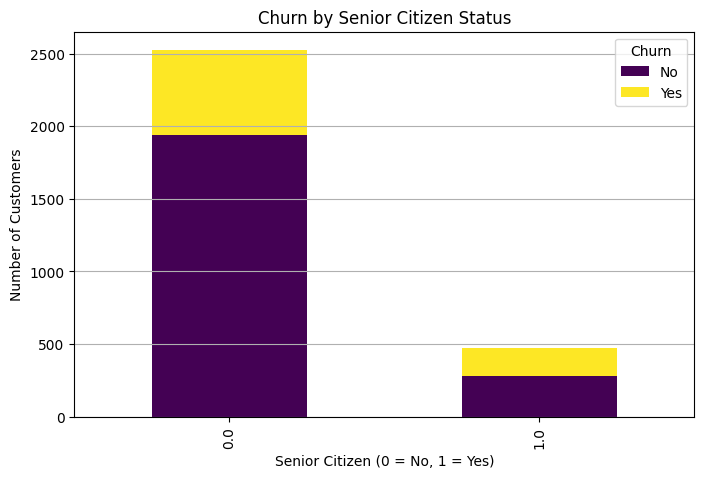

In [7]:
import matplotlib.pyplot as plt

telco_churn = pd.read_csv("telco_churn.csv", delimiter=",")

telco_churn["Churn"] = telco_churn["Churn"].map({"True": 1, "False": 0})  # Convert churn to binary
telco_churn["SeniorCitizen"] = telco_churn["SeniorCitizen"].map({"True": 1, "False": 0})  # Convert churn to binary


# Group and count occurrences
churn_counts = telco_churn.groupby("SeniorCitizen")["Churn"].value_counts().unstack()

# Plot grouped bar chart
churn_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")

# Customize labels and title
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.title("Churn by Senior Citizen Status")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.grid(axis="y")

# Show plot
plt.show()